This notebook consists of code that helps you visualize data in a dataframe. I have focused mainly on seaborn!

# **`                  SEABORN - HANDS ON ACTIVITY`**


In [ ]:
%matplotlib inline
#ensures that all graphs plotted remains in the same notebook
import pandas as pd
#load up pandas to work with dataframes

df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")
#load up a real dataset about fuel efficiency in vehicles

In [ ]:
df.head()
#head function called to print only the first 5 rows

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [ ]:
gear_counts = df['# Gears'].value_counts()
#shows the counts of all values in number of gears - we can use this to plot a bar plot

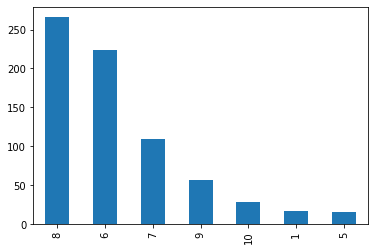

In [ ]:
gear_counts.plot(kind='bar')
#so far we have been using matplotlib, now lets move onto seaborn

In [ ]:
import seaborn as sns
sns.set()
#set function overwrites the matplotlib setting style for the graphs created to seaborn style

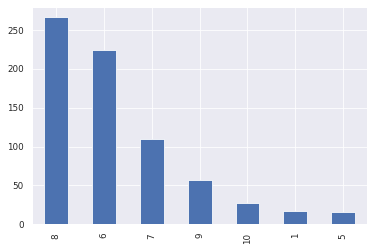

In [ ]:
#add in a style you prefer here!
sns.set_style('darkgrid')
sns.set_context('paper')

ax = gear_counts.plot(kind='bar')

#sns.despine()

# **`DISTRIBUTION PLOT - distplot`**

Seaborn has many plots matplot doesnt offer, now we shall use the distplot which plots a histogram along with a Distribution of that histogram overlaid on it.

Let's plot the distribution of MPG values on the vehicles in this database as an example.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Combined Miles Per Gallon')]

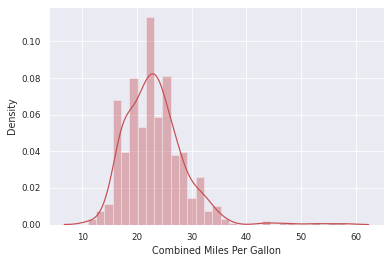

In [ ]:
#feel free to change any parameters for your preference!
#sns.set_style()
#sns.set_context()

ax = sns.distplot(df['CombMPG'], color='r')

ax.set(xlabel='Combined Miles Per Gallon', ylabel='Density')

# **`SCATTER PLOT - scatterplot`**

[Text(0, 0.5, 'Combined MPG'), Text(0.5, 0, 'Engine Displacement')]

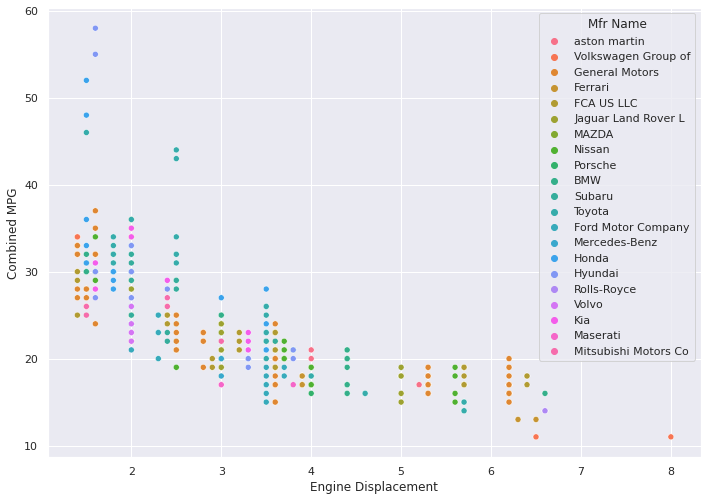

In [ ]:
#Add a hue that makes sense to you!
#The code below aids in changing the size of your ouput graph
sns.set(rc={'figure.figsize':(11.7,8.27)})

#ax = sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

ax = sns.scatterplot(x="Eng Displ", y="CombMPG", data=df, hue="Mfr Name")

ax.set(xlabel='Engine Displacement', ylabel='Combined MPG')

# **`JOINT PLOT - jointplot`**

In [ ]:
#Loading in a built in dataset from seaborn regarding car crashes
crashes = sns.load_dataset('car_crashes')

In [ ]:
#see what the dataframe looks like
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


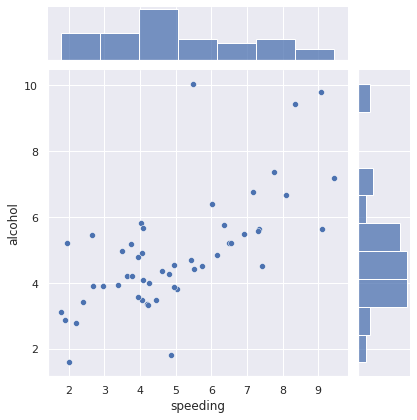

In [ ]:
#Add in your preference for the kind parameter
ax = sns.jointplot(x='speeding', y='alcohol', data=crashes)

#ax = sns.jointplot(x='speeding', y='alcohol', data=crashes, kind=, color=)

# **`SCATTER PLOT WITH REGRESSION LINE - lmplot`**

In [ ]:
ax = sns.lmplot(x="alcohol", y="speeding", data=crashes)

# **`BOX PLOT - boxplot`**

In [ ]:
#Loading in a built in dataset from seaborn regarding waiter tips given by people
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
sns.set_style()
#controls the general style of plots

sns.set_context()
#controls the scaling of plots

#ax = sns.boxplot(x='day', y='total_bill', data=tips)

ax = sns.boxplot(x='day', y='total_bill', data=tips, hue='sex', palette='viridis')

ax.set(xlabel='Day of Week', ylabel='Total Bill Price')

In [ ]:
#Another example of boxplot - Manafacturer Name vs Combined MPG
#Add in the figsize of your preference
sns.set(rc={'figure.figsize':(15,5)})

ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)

#Rotation of manafacturer name to fit the names in a clearer manner
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

ax.set(xlabel='Manufacturer Name', ylabel='Combined MPG')

# **`SWARM PLOT - swarmplot`**

In [ ]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df);

ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

# **`PAIR PLOT - pairplot`**

In [ ]:
#Loading the very famous iris dataset to show how pairplot works
iris = sns.load_dataset("iris")

iris.head()

In [ ]:
#sns.pairplot(iris)

sns.pairplot(iris, hue = 'species')

#ax = sns.pairplot(iris, hue = 'species', markers=["o", "s", "D"], palette="magma")

# **`VIOLIN PLOT - violinplot`**

In [ ]:
#ax = sns.violinplot(x='day', y='total_bill', data = tips)

ax = sns.violinplot(x='day', y='total_bill', data = tips, hue='sex', palette='viridis')

#ax = sns.violinplot(x='day', y='total_bill', data = tips, hue='sex', scale='count', palette="viridis")

#ax = sns.violinplot(x='day', y='total_bill', data = tips, hue='sex', palette='viridis', inner='quartile')

ax.set(xlabel="Day of Week", ylabel="Total Bill Price")

# **`HEATMAP - heatmap`**

In [ ]:
#Loading external dataset from seaborn - flight attendance details
flights = sns.load_dataset("flights")

flights.head()

In [ ]:
#pivoting table to manipulate table to our ease
flights = flights.pivot_table(index='month', columns='year', values = 'passengers')

flights.head()

In [ ]:
ax = sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

ax.set(xlabel="Year", ylabel="Month")

# **`THANK YOU FOR TAKING PART IN MY DEMO :)`**